In [1]:
from poola import core as pool
import pandas as pd
import seaborn as sns
import gpplot as gpp
import matplotlib.pyplot as plt
gpp.set_aesthetics(context = 'paper')

In [15]:
#define paths
file_path = "../../Data/primaryLibrary/"
figure1_outpath = '../../Figures/Figure 1/'

In [16]:
#read in read counts
file = file_path + 'counts-GR_A549_RDB181.txt'
A549_Kox1 = pd.read_table(file)

In [17]:
A549_Kox1.head()

,Construct Barcode,Construct IDs,A549_RDB_181 repA,pDNA CP1948,A549_RDB_181 repB,Unlabeled Sample Barcodes
0,ATAGCGACGTCCGTTGGACA,ATAGCGACGTCCGTTGGACA,232,57,299,0
1,ACCCGGACTACGCCATGTTG,ACCCGGACTACGCCATGTTG,74,48,89,0
2,AGTACCCCTATTCAACCGGA,AGTACCCCTATTCAACCGGA,328,51,344,0
3,TAATCAGAGGAACTACGTTT,TAATCAGAGGAACTACGTTT,305,47,352,0
4,TATGGCTGTCACCTAGATCA,TATGGCTGTCACCTAGATCA,156,65,204,0


In [18]:
#read in design file
design_file = file_path + 'essentials_nonessentials_CRISPRi_tiling_designs_v2.csv'
ess_noness = pd.read_csv(design_file)
ess_noness = ess_noness[['Target Gene Symbol','Target Gene ID','Category','TSS Position', 
       'sgRNA \'Cut\' Site TSS Offset','sgRNA Sequence', 
           'sgRNA Context Sequence', 'On-Target Ruleset',
       'On-Target Efficacy Score']]
ess_noness.head()

,Target Gene Symbol,Target Gene ID,Category,TSS Position,sgRNA 'Cut' Site TSS Offset,sgRNA Sequence,sgRNA Context Sequence,On-Target Ruleset,On-Target Efficacy Score
0,ATP5F1B,506.0,Essential,56645984.0,-255.0,ATAGCGACGTCCGTTGGACA,GATCATAGCGACGTCCGTTGGACAGGGTAA,RS3seq-Chen2013,0.9257
1,ATP5F1B,506.0,Essential,56645984.0,24.0,ACCCGGACTACGCCATGTTG,CTCCACCCGGACTACGCCATGTTGGGGTTT,RS3seq-Chen2013,0.7588
2,ATP5F1B,506.0,Essential,56645984.0,396.0,AGTACCCCTATTCAACCGGA,GTTCAGTACCCCTATTCAACCGGAAGGTCA,RS3seq-Chen2013,0.7492
3,ATP5F1B,506.0,Essential,56645984.0,-278.0,TAATCAGAGGAACTACGTTT,AGGGTAATCAGAGGAACTACGTTTAGGAAA,RS3seq-Chen2013,0.7506
4,ATP5F1B,506.0,Essential,56645984.0,-362.0,TATGGCTGTCACCTAGATCA,CCCCTATGGCTGTCACCTAGATCAAGGACC,RS3seq-Chen2013,0.9978


In [19]:
#calculate log-normalized reads, filter guides with low representation in pDNA
lognorms_A549_Kox1 = pool.lognorm_columns(reads_df=A549_Kox1, columns=['A549_RDB_181 repA','pDNA  CP1948', 'A549_RDB_181 repB'])
filtered_lognorms_lognorms_A549_Kox1 = pool.filter_pdna(lognorm_df=lognorms_A549_Kox1, pdna_cols=['pDNA  CP1948'], z_low=-3)
print('Filtered ' + str(lognorms_A549_Kox1.shape[0] - filtered_lognorms_lognorms_A549_Kox1.shape[0]) + ' rows due to low pDNA abundance')

Filtered 621 rows due to low pDNA abundance


In [20]:
#calculate log-fold changes
lfc_df_A549_Kox1 = pool.calculate_lfcs(lognorm_df=filtered_lognorms_lognorms_A549_Kox1, 
                                         ref_col='pDNA  CP1948', target_cols=['A549_RDB_181 repA', 'A549_RDB_181 repB'])
lfc_df_A549_Kox1.head()

,Construct Barcode,Construct IDs,A549_RDB_181 repA,A549_RDB_181 repB,Unlabeled Sample Barcodes
0,ATAGCGACGTCCGTTGGACA,ATAGCGACGTCCGTTGGACA,-1.037877,-0.662310,0
1,ACCCGGACTACGCCATGTTG,ACCCGGACTACGCCATGTTG,-1.961783,-1.750208,0
2,AGTACCCCTATTCAACCGGA,AGTACCCCTATTCAACCGGA,-0.478648,-0.344259,0
3,TAATCAGAGGAACTACGTTT,TAATCAGAGGAACTACGTTT,-0.462704,-0.210463,0
4,TATGGCTGTCACCTAGATCA,TATGGCTGTCACCTAGATCA,-1.652047,-1.288802,0


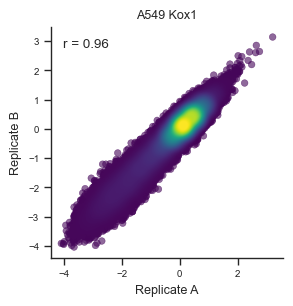

In [21]:
#plot correlation between replicate LFCs
plt.subplots(figsize=(3,3))
gpp.point_densityplot(data=lfc_df_A549_Kox1, x='A549_RDB_181 repA', y='A549_RDB_181 repB')
gpp.add_correlation(data=lfc_df_A549_Kox1, x='A549_RDB_181 repA', y='A549_RDB_181 repB')
sns.despine()
plt.xlabel('Replicate A',fontsize=9)
plt.ylabel('Replicate B',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('A549 Kox1',fontsize=9)
gpp.savefig(figure1_outpath+'A549_Kox1_rep_corr.pdf',dpi=300, bbox_inches='tight')

In [22]:
lfc_df_A549_Kox1 = lfc_df_A549_Kox1[['Construct Barcode','A549_RDB_181 repA','A549_RDB_181 repB']]

In [23]:
#calculate average LFC across replicates
avg_replicate_lfc_df_A549_Kox1 = pool.average_replicate_lfcs(lfcs=lfc_df_A549_Kox1, guide_col='Construct Barcode', condition_indices=[0],sep='_')
avg_replicate_lfc_df_A549_Kox1.head()

,Construct Barcode,condition,avg_lfc,n_obs
0,AAAAAAAAAAAGGGCAGAAG,A549,-0.376159,2
1,AAAAAAAAAAATTAGACCTC,A549,-0.021644,2
2,AAAAAAAAAACAGGACACAG,A549,0.031810,2
3,AAAAAAAAAACGTTGTGCAG,A549,-0.722006,2
4,AAAAAAAAAACTGTTATTTG,A549,0.068155,2


In [24]:
avg_replicate_lfc_df_A549_Kox1.rename(columns={'Construct Barcode':'sgRNA Sequence'}, inplace = True)

In [25]:
#z-score guide LFCs relative to intergenic controls
annot_guide_lfcs_A549_Kox1 = pool.annotate_guide_lfcs(avg_replicate_lfc_df_A549_Kox1, ess_noness, 'Target Gene Symbol',
                                            merge_on='sgRNA Sequence', z_score_neg_ctls=True,
                                            z_score_neg_ctl_genes='ONE_INTERGENIC')
annot_guide_lfcs_A549_Kox1.head()

,sgRNA Sequence,condition,avg_lfc,n_obs,Target Gene Symbol,Target Gene ID,Category,TSS Position,sgRNA 'Cut' Site TSS Offset,sgRNA Context Sequence,On-Target Ruleset,On-Target Efficacy Score,z_scored_avg_lfc
0,AAAAAAAAAAAGGGCAGAAG,A549,-0.376159,2,APOBEC1,339.0,Non-essential,7665908.0,-999.0,AAAAAAAAAAAAAAAGGGCAGAAGTGGACT,RS3seq-Chen2013,-0.7248,-1.389004
1,AAAAAAAAAAATTAGACCTC,A549,-0.021644,2,MRGPRD,116512.0,Non-essential,68980986.0,-735.0,AAAAAAAAAAAAAAATTAGACCTCAGGGCA,RS3seq-Chen2013,-0.6309,-0.528140
2,AAAAAAAAAACAGGACACAG,A549,0.031810,2,LARS2,23395.0,Essential,45388577.0,667.0,CAGAAAAAAAAAAACAGGACACAGGGGAGA,RS3seq-Chen2013,0.0140,-0.398339
3,AAAAAAAAAACGTTGTGCAG,A549,-0.722006,2,PRAMEF4,400735.0,Non-essential,12886201.0,393.0,CCTCAAAAAAAAAACGTTGTGCAGAGGAGG,RS3seq-Chen2013,-0.7256,-2.228821
4,AAAAAAAAAACTGTTATTTG,A549,0.068155,2,CLEC6A,93978.0,Non-essential,8455963.0,-853.0,AAAAAAAAAAAAAACTGTTATTTGAGGAAT,RS3seq-Chen2013,-1.2190,-0.310082


In [26]:
annot_guide_lfcs_A549_Kox1.to_csv(file_path + 'A549_Kox1_zscored.csv', index = False)